### Elliot Ide Pozo

# Actividad práctica 

### Instrucciones
- Escriba las rutinas de Python necesarias para resolver los problemas de cada punto
- Siga las instrucciones y conteste donde se pida
- Entregue el notebook con sus respuestas al correo: phuijse@inf.uach.cl
- El trabajo es individual

### Introducción
En esta actividad usaremos la base de datos [*Auto Milles per Gallon Data Set*](https://archive.ics.uci.edu/ml/datasets/auto+mpg) del repositorio UCI

Puede descargarla usando el siguiente bloque

In [1]:
%%bash
wget -O auto.csv -c https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original 
wget -O README -c https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names 

--2019-05-09 23:24:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original
Resolviendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Conectando con archive.ics.uci.edu (archive.ics.uci.edu)[128.195.10.252]:443... conectado.
Petición HTTP enviada, esperando respuesta... 416 Requested Range Not Satisfiable

    El archivo ya se ha obtenido por completo; no hay nada que hacer.

--2019-05-09 23:24:43--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names
Resolviendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Conectando con archive.ics.uci.edu (archive.ics.uci.edu)[128.195.10.252]:443... conectado.
Petición HTTP enviada, esperando respuesta... 416 Requested Range Not Satisfiable

    El archivo ya se ha obtenido por completo; no hay nada que hacer.



### Información preliminar

1. Use las herramientas de UNIX para leer el archivo README en el notebook



In [2]:
!cat README

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

2. Responda ¿Cuántos y cuáles son los atributos (características)? ¿De qué tipo es cada uno?

Son 9 atributos, incluyendo el atributo de clase:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

3. Responda ¿Cuantas instancias/ejemplos existen?

_Existen 398 instancias._

_"Los datos se refieren al consumo de combustible en el ciclo urbano en millas por galón, que se pronosticará en términos de 3 atributos discretos multivalor y 5 atributos continuos". (Quinlan, 1993)"_

### Lectura de datos

1. Cree un `DataFrame` a partir de `auto.csv` 
    1. Use una columna por atributo* 
    1. Use los nombres de columna descritos en `README` 
1. Imprima las primeras 5 filas del dataframe

**HINT:** Verifique el uso  del argumento `delim_whitespace`*

In [3]:
import pandas as pd

headers = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'myear','origin', 'cname']
df = pd.read_csv(r'./auto.csv', delim_whitespace=True, names=headers)
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,myear,origin,cname
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### Manipulación de columnas 

1. Convierta las columnas *cylinders*, *year* y *origin* a valores enteros



In [4]:
df.cylinders = df.cylinders.astype(int)
df.myear = df.myear.astype(int)
df.origin = df.origin.astype(int)
df.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
myear             int64
origin            int64
cname            object
dtype: object

2. Reemplace los valores $[1, 2, 3]$ de *origin* por *USA*, *Europe*, *Japan*, respectivamente

Fuente: http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [5]:
def cambiar_origen(n):
    if n == 1:
        return "USA"
    if n == 2:
        return "Europe"
    if n == 3:
        return "Japan"  

In [6]:
df["origin"] = df["origin"].apply(cambiar_origen) #aplicar esto una segunda vez, deja los valores como none
#df.head(20)

3. Convierta los valores de la columna *mpg* (galones por milla) a kmpl (kilómetros por litro)

5. Modifique el nombre de la columna *mpg* a kmpl (5)

In [7]:
#1 Gallon per Mile  =  2.352145 Liter per Kilometer
df["mpg"] = df["mpg"].apply(lambda x: 2.352145*x)
df.rename(columns = {"mpg": "kmpl"}, inplace=True) 
df.head()


,kmpl,cylinders,displacement,horsepower,weight,acceleration,myear,origin,cname
0,42.338610,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,35.282175,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,42.338610,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,37.634320,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,39.986465,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


4. Convierta los valores de la columna peso de libras (*pounds*) a kilogramos


In [8]:
#1 lbs = 0.45359237 kg
df["weight"] = df["weight"].apply(lambda x: 0.45359237*x)

In [9]:
df.head()

,kmpl,cylinders,displacement,horsepower,weight,acceleration,myear,origin,cname
0,42.338610,8,307.0,130.0,1589.387664,12.0,70,USA,chevrolet chevelle malibu
1,35.282175,8,350.0,165.0,1675.116622,11.5,70,USA,buick skylark 320
2,42.338610,8,318.0,150.0,1558.543383,11.0,70,USA,plymouth satellite
3,37.634320,8,304.0,150.0,1557.182606,12.0,70,USA,amc rebel sst
4,39.986465,8,302.0,140.0,1564.440084,10.5,70,USA,ford torino


### Datos perdidos

1. Encuentre los nombres de los autos que tengan valores perdidos (*missing data*)

In [10]:
display(df.cname[df.isna().any(axis=1)]) #al menos 1 NaN

10                 citroen ds-21 pallas
11     chevrolet chevelle concours (sw)
12                     ford torino (sw)
13              plymouth satellite (sw)
14                   amc rebel sst (sw)
17                ford mustang boss 302
38                           ford pinto
39          volkswagen super beetle 117
133                       ford maverick
337                renault lecar deluxe
343                  ford mustang cobra
361                         renault 18i
367                           saab 900s
382                      amc concord dl
Name: cname, dtype: object

2. Encuentre los nombres de los atributos que tengan valores perdidos

In [11]:
display(df.columns[df.isna().any()].tolist())

['kmpl', 'horsepower']

3. Elimines las filas con atributos perdidos ¿Cuántas filas quedan en el dataframe?

_392 filas_

In [12]:
df.dropna(inplace=True)
df.head()

,kmpl,cylinders,displacement,horsepower,weight,acceleration,myear,origin,cname
0,42.338610,8,307.0,130.0,1589.387664,12.0,70,USA,chevrolet chevelle malibu
1,35.282175,8,350.0,165.0,1675.116622,11.5,70,USA,buick skylark 320
2,42.338610,8,318.0,150.0,1558.543383,11.0,70,USA,plymouth satellite
3,37.634320,8,304.0,150.0,1557.182606,12.0,70,USA,amc rebel sst
4,39.986465,8,302.0,140.0,1564.440084,10.5,70,USA,ford torino


### Multi-índice

1. Cree un dataframe con dos columnas a partir del atributo "*car name*"
    1. La primera columna debe tener la primera palabra del string en *car name**
    1. La segunda columna debe tener el resto del string en *car name*

**HINT:** Verifique el uso de `.str.split()`* y `str.replace()`**

In [13]:
new_df = df.cname.str.split(n=1, expand=True)
new_df.rename(columns = {0: "brand", 1: "model"}, inplace=True) 

new_df.head()

,brand,model
0,chevrolet,chevelle malibu
1,buick,skylark 320
2,plymouth,satellite
3,amc,rebel sst
4,ford,torino


2. Elimine la columna *car name* del dataframe y agregue estas nuevas columnas llamándolas *brand* y *model*, respectivamente

In [14]:
df.drop(["cname"], axis=1, inplace=True)
df = pd.concat([df, new_df], axis=1)
#df.head(20)

3. ¿Cuántas marcas (*brand*) únicas existan? ¿Existen columnas repetidas o mal escritas? Mencione cuales y corrijalas**

_37 marcas unicas. **Si**, esta toyouta, maxda, chevroelt, vw - vokswagen y mercedes_


In [15]:
display(df['brand'].nunique()
        ,df['brand'].unique()
       )

37

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [16]:
def corregir_marca(b):
    if b == "toyouta":
        return "toyota"
    if b == "maxda":
        return "mazda"
    if b == "chevroelt":
        return "chevrolet"
    if b == "vw" or b == "vokswagen":
        return "volkswagen"
    if b == "mercedes":
        return "mercedes-benz"
    else:
        return b

In [17]:
df["brand"] = df["brand"].apply(corregir_marca)
df.head(20)

,kmpl,cylinders,displacement,horsepower,weight,acceleration,myear,origin,brand,model
0,42.338610,8,307.0,130.0,1589.387664,12.0,70,USA,chevrolet,chevelle malibu
1,35.282175,8,350.0,165.0,1675.116622,11.5,70,USA,buick,skylark 320
2,42.338610,8,318.0,150.0,1558.543383,11.0,70,USA,plymouth,satellite
3,37.634320,8,304.0,150.0,1557.182606,12.0,70,USA,amc,rebel sst
4,39.986465,8,302.0,140.0,1564.440084,10.5,70,USA,ford,torino
5,35.282175,8,429.0,198.0,1969.044478,10.0,70,USA,ford,galaxie 500
6,32.930030,8,454.0,220.0,1974.941179,9.0,70,USA,chevrolet,impala
7,32.930030,8,440.0,215.0,1955.890299,8.5,70,USA,plymouth,fury iii
8,32.930030,8,455.0,225.0,2007.146237,10.0,70,USA,pontiac,catalina
9,35.282175,8,390.0,190.0,1746.330625,8.5,70,USA,amc,ambassador dpl


In [18]:
display(df['brand'].nunique()
        ,df['brand'].unique()
       )

31

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'honda',
       'subaru', 'capri', 'mercedes-benz', 'cadillac', 'triumph',
       'nissan'], dtype=object)

4. Cree un multi-índice que utilice como primera llave a *brand* y como segunda a *model*

In [19]:
df_mix = df
df_mix.reset_index()
df_mix = df_mix.set_index(["brand", "model"])
df_mix.head(10)

kmpl  cylinders  displacement  horsepower  \
brand     model                                                             
chevrolet chevelle malibu  42.338610          8         307.0       130.0   
buick     skylark 320      35.282175          8         350.0       165.0   
plymouth  satellite        42.338610          8         318.0       150.0   
amc       rebel sst        37.634320          8         304.0       150.0   
ford      torino           39.986465          8         302.0       140.0   
          galaxie 500      35.282175          8         429.0       198.0   
chevrolet impala           32.930030          8         454.0       220.0   
plymouth  fury iii         32.930030          8         440.0       215.0   
pontiac   catalina         32.930030          8         455.0       225.0   
amc       ambassador dpl   35.282175          8         390.0       190.0   

                                weight  acceleration  myear origin  
brand     model                                                     
chevrolet chevelle malibu  1589.387664          12.0     70    USA  
buick     skylark 320      1675.116622          11.5     70    USA  
plymouth  satellite        1558.543383          11.0     70    USA  
amc       rebel sst        1557.182606          12.0     70    USA  
ford      torino           1564.440084          10.5     70    USA  
          galaxie 500      1969.044478          10.0     70    USA  
chevrolet impala           1974.941179           9.0     70    USA  
plymouth  fury iii         1955.890299           8.5     70    USA  
pontiac   catalina         2007.146237          10.0     70    USA  
amc       ambassador dpl   1746.330625           8.5     70    USA

In [20]:
display(df_mix.index)

MultiIndex(levels=[['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'mazda', 'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'triumph', 'volkswagen', 'volvo'], [''cuda 340', '100 ls', '100ls', '1131 deluxe sedan', '12 (sw)', '1200', '1200d', '124 sport coupe', '124 tc', '124b', '128', '12tl', '131', '144ea', '145e (sw)', '1900', '200-sx', '2002', '200sx', '210', '210 mpg', '240d', '244dl', '245', '264gl', '280-zx', '280s', '304', '310', '310 gx', '320i', '4000', '411 (sw)', '5 gtl', '5000', '5000s (diesel)', '504', '504 (sw)', '505s turbo diesel', '510', '510 (sw)', '510 hatchback', '604sl', '610', '626', '710', '810', '810 maxima', '99e', '99gle', '99le', 'accord', 'accord cvcc', 'accord lx', 'ambassador brougham', 'ambassador dpl', 'ambassador sst', 'aries se', 'aries wagon (sw)', 'arrow gs', 'aspen', 'aspen 6', '

5. Muestre los autos con marca *Mazda*

_Indexando y haciendo slicing con dataframes multi-indexados_

_Usamos una tupla para especificar los índices primario y secundario_

In [21]:
#idx = pd.IndexSlice

display(df_mix.loc["mazda"])

,kmpl,cylinders,displacement,horsepower,weight,acceleration,myear,origin
model,,,,,,,,
rx2 coupe,44.690755,3,70.0,97.0,1056.870222,13.5,72,Japan
rx3,42.338610,3,70.0,90.0,963.430194,13.5,73,Japan
rx-4,50.571117,3,80.0,110.0,1233.771246,13.5,77,Japan
glc deluxe,77.150356,4,78.0,52.0,900.380854,19.4,78,Japan
glc deluxe,80.208145,4,86.0,65.0,895.844931,15.2,79,Japan
626,73.622139,4,120.0,75.0,1153.031805,17.5,80,Japan
glc,109.609957,4,86.0,65.0,957.079901,17.9,80,Japan
rx-7 gs,55.745837,3,70.0,100.0,1097.693535,12.5,80,Japan
glc 4,80.208145,4,91.0,68.0,900.380854,16.0,81,Japan


6. Usando groupby cuente la cantidad de modelos por marca

_Aplicamos reducciones condicionales a la etiqueta model (sin multi-indice)_

In [22]:
display(df.groupby(['brand','model']).size())

brand       model                 
amc         ambassador brougham       1
            ambassador dpl            1
            ambassador sst            1
            concord                   2
            concord d/l               1
            concord dl 6              1
            gremlin                   4
            hornet                    4
            hornet sportabout (sw)    1
            matador                   5
            matador (sw)              2
            pacer                     1
            pacer d/l                 1
            rebel sst                 1
            spirit dl                 1
audi        100 ls                    1
            100ls                     2
            4000                      1
            5000                      1
            5000s (diesel)            1
            fox                       1
bmw         2002                      1
            320i                      1
buick       century                   2
     

### Buscando autos

1. Por cada marca encuentre el auto más antiguo y el más nuevo
1. Por cada marca encuentre el auto más pesado y el más liviano
1. Por cada marca encuentre los autos con mayor y menor caballos de fuerza, respectivamente
1. Por cada marca encuentre los autos con menor y mayor desempeño en términos de kmpl, respectivamente

In [23]:
display(df.groupby(['brand'])['myear'].min(),
        df.groupby(['brand'])['myear'].max(),
        df.groupby(['brand'])['horsepower'].min(),
        df.groupby(['brand'])['horsepower'].max(),
        df.groupby(['brand'])['kmpl'].min(),
        df.groupby(['brand'])['kmpl'].max(),        
       )

brand
amc              70
audi             70
bmw              70
buick            70
cadillac         76
capri            76
chevrolet        70
chevy            70
chrysler         72
datsun           70
dodge            70
fiat             71
ford             70
hi               70
honda            74
mazda            72
mercedes-benz    76
mercury          71
nissan           82
oldsmobile       72
opel             71
peugeot          70
plymouth         70
pontiac          70
renault          72
saab             70
subaru           74
toyota           70
triumph          80
volkswagen       70
volvo            72
Name: myear, dtype: int64

brand
amc              80
audi             80
bmw              77
buick            82
cadillac         79
capri            76
chevrolet        82
chevy            82
chrysler         82
datsun           82
dodge            82
fiat             79
ford             82
hi               70
honda            82
mazda            82
mercedes-benz    80
mercury          82
nissan           82
oldsmobile       82
opel             76
peugeot          81
plymouth         82
pontiac          82
renault          77
saab             78
subaru           81
toyota           82
triumph          80
volkswagen       82
volvo            81
Name: myear, dtype: int64

brand
amc               80.0
audi              67.0
bmw              110.0
buick             80.0
cadillac         125.0
capri             92.0
chevrolet         52.0
chevy             82.0
chrysler          85.0
datsun            61.0
dodge             75.0
fiat              49.0
ford              65.0
hi               193.0
honda             53.0
mazda             52.0
mercedes-benz     67.0
mercury           70.0
nissan            88.0
oldsmobile        85.0
opel              75.0
peugeot           70.0
plymouth          63.0
pontiac           78.0
renault           58.0
saab              95.0
subaru            67.0
toyota            52.0
triumph           88.0
volkswagen        46.0
volvo             76.0
Name: horsepower, dtype: float64

brand
amc              190.0
audi             103.0
bmw              113.0
buick            225.0
cadillac         180.0
capri             92.0
chevrolet        220.0
chevy            200.0
chrysler         215.0
datsun           132.0
dodge            210.0
fiat              90.0
ford             215.0
hi               193.0
honda             97.0
mazda            110.0
mercedes-benz    120.0
mercury          208.0
nissan            88.0
oldsmobile       180.0
opel              90.0
peugeot          133.0
plymouth         215.0
pontiac          230.0
renault           83.0
saab             115.0
subaru            93.0
toyota           122.0
triumph           88.0
volkswagen        78.0
volvo            125.0
Name: horsepower, dtype: float64

brand
amc              30.577885
audi             47.042900
bmw              50.571117
buick            28.225740
cadillac         38.810393
capri            58.803625
chevrolet        25.873595
chevy            23.521450
chrysler         30.577885
datsun           51.747190
dodge            25.873595
fiat             56.451480
ford             23.521450
hi               21.169305
honda            56.451480
mazda            42.338610
mercedes-benz    38.810393
mercury          25.873595
nissan           84.677220
oldsmobile       25.873595
opel             56.451480
peugeot          38.104749
plymouth         30.577885
pontiac          30.577885
renault          61.155770
saab             50.806332
subaru           61.155770
toyota           44.690755
triumph          82.325075
volkswagen       51.747190
volvo            39.986465
Name: kmpl, dtype: float64

brand
amc               64.448773
audi              85.618078
bmw               61.155770
buick             70.564350
cadillac          54.099335
capri             58.803625
chevrolet         79.972930
chevy             72.916495
chrysler          61.155770
datsun            95.967516
dodge             84.677220
fiat              87.735008
ford              84.912435
hi                21.169305
honda            104.905667
mazda            109.609957
mercedes-benz     70.564350
mercury           84.677220
nissan            84.677220
oldsmobile        89.381510
opel              65.860060
peugeot           70.564350
plymouth          91.733655
pontiac           78.796858
renault           84.677220
saab              58.803625
subaru            79.502501
toyota            91.968870
triumph           82.325075
volkswagen       104.200024
volvo             72.210852
Name: kmpl, dtype: float64

### Análisis exploratorio

1. Encuentre el promedio y la desviación estándar de cada atributo numérico en toda la tabla y por marca

Fuente: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html

In [24]:
display(df.groupby(['brand']).mean(),
        df.groupby(['brand']).std())

,kmpl,cylinders,displacement,horsepower,weight,acceleration,myear
brand,,,,,,,
amc,42.504131,6.444444,253.851852,114.703704,1492.201299,15.070370,74.000000
audi,62.835874,4.285714,111.857143,86.714286,1159.446897,15.942857,75.714286
bmw,55.863444,4.000000,121.000000,111.500000,1096.332758,12.650000,73.500000
buick,45.119676,6.470588,272.941176,136.411765,1611.773782,14.700000,76.117647
cadillac,46.454864,8.000000,350.000000,152.500000,1877.872412,14.750000,77.500000
capri,58.803625,4.000000,140.000000,92.000000,1166.639576,14.900000,76.000000
chevrolet,47.914263,6.136364,238.136364,112.750000,1492.380751,15.393182,75.500000
chevy,42.338610,6.666667,258.666667,142.333333,1686.002839,15.466667,76.000000
chrysler,40.613704,7.000000,330.166667,153.666667,1774.453351,13.300000,77.333333


,kmpl,cylinders,displacement,horsepower,weight,acceleration,myear
brand,,,,,,,
amc,7.586510,1.154701,56.839656,29.431557,206.571999,2.730006,3.012793
audi,15.601436,0.487950,12.253279,11.842217,132.877645,1.946670,3.773340
bmw,7.484480,0.000000,0.000000,2.121320,117.390196,0.212132,4.949747
buick,13.550692,1.504894,103.366140,45.098585,354.438974,2.581666,3.756367
cadillac,10.810915,0.000000,0.000000,38.890873,153.954356,3.747666,2.121320
capri,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chevrolet,14.460016,1.746637,102.660785,35.435579,363.954666,3.117348,3.605551
chevy,26.715232,2.309401,122.850858,59.045180,398.353021,3.722007,6.000000
chrysler,11.399211,1.673320,113.226175,54.650404,355.398812,1.977878,4.131182


2. Construya gráficos de barras del rendimiento (kmpl) promedio en función del año, peso, origen,  número de cilindros y marca (use *barras de error* con la desviación estándar del rendimiento)
3. Viendo estos gráficos, ¿Qué puede concluir respecto a la relación del rendimiento con estos factores?

Fuente: https://megapteraphile.wordpress.com/2015/11/03/plotting-means-and-stds-with-pandas/

In [25]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


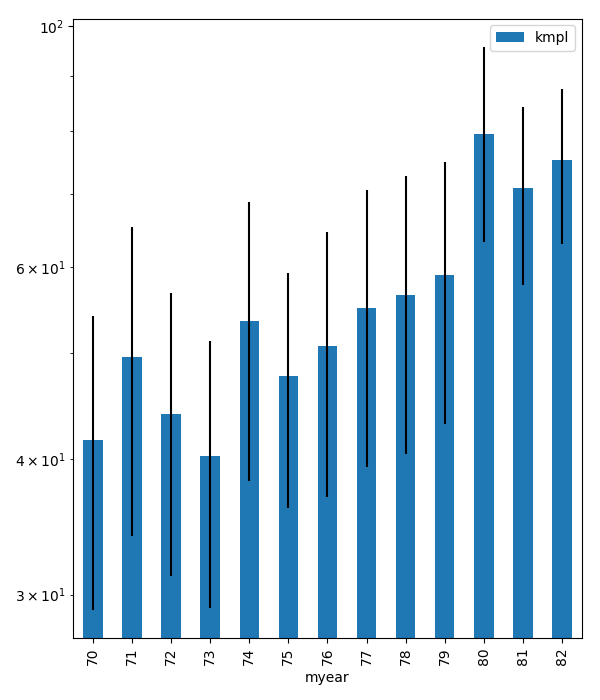

In [26]:
df_redu = df.groupby(['myear']).mean()

fig, ax = plt.subplots(figsize=(6, 7), tight_layout=True)
df_redu.plot(ax=ax, y=0, kind='bar', logy=True, yerr=df.groupby(['myear']).std());

Son muchos pesos diferentes.

In [33]:
df_redu2 = df.groupby(['weight']).mean()

fig, ax = plt.subplots(figsize=(6, 7), tight_layout=True)
df_redu2.plot(ax=ax, y=0, kind='bar', logy=True, yerr=df.groupby(['weight']).std());

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


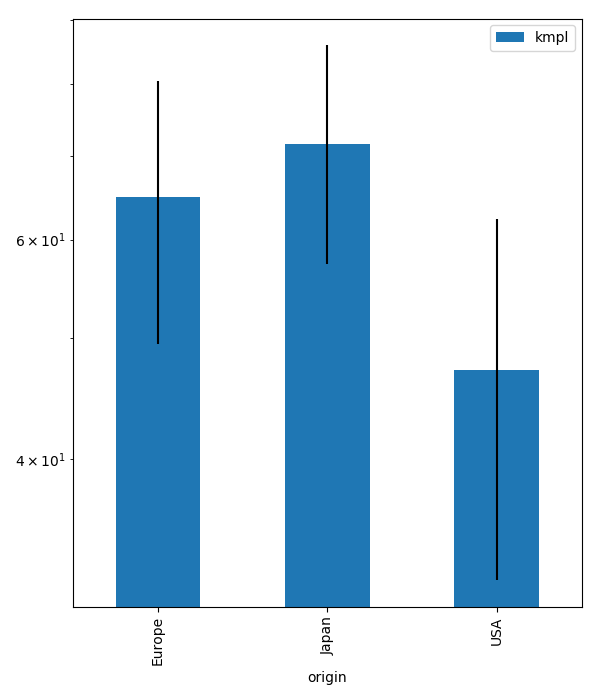

In [28]:
df_redu3 = df.groupby(['origin']).mean()

fig, ax = plt.subplots(figsize=(6, 7), tight_layout=True)
df_redu3.plot(ax=ax, y=0, kind='bar', logy=True, yerr=df.groupby(['origin']).std());

<IPython.core.display.Javascript object>


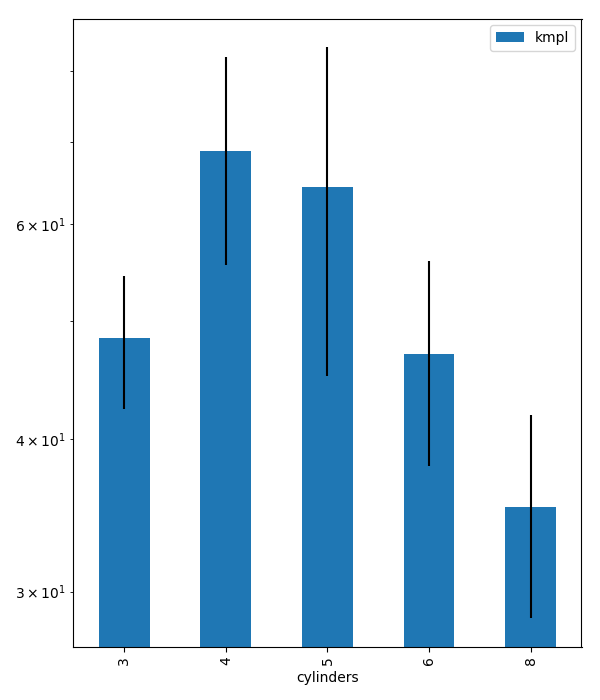

In [29]:
df_redu4 = df.groupby(['cylinders']).mean()

fig, ax = plt.subplots(figsize=(6, 7), tight_layout=True)
df_redu4.plot(ax=ax, y=0, kind='bar', logy=True, yerr=df.groupby(['cylinders']).std());

<IPython.core.display.Javascript object>


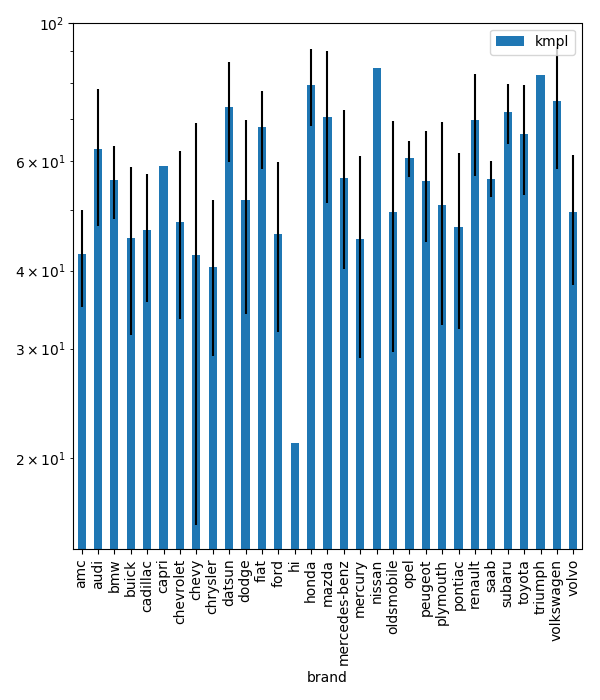

In [30]:
df_redu5 = df.groupby(['brand']).mean()

fig, ax = plt.subplots(figsize=(6, 7), tight_layout=True)
df_redu5.plot(ax=ax, y=0, kind='bar', logy=True, yerr=df.groupby(['brand']).std());

**Considerando unicamente los graficos:**

- Con el tiempo los autos han aumentado su consumo.
- Los autos de origen Japones son los que consumen más combustible, y los de USA menos.
- A mayor número de cilindros menor consumo.
- Nissan es la marca con mayor consumo, hi es la menor.

### Gráficos interactivos

1. Construya una interfaz gráfica usando `ipywidgets` que permita seleccionar dos atributos y los gráfique como un *scatter plot*
    1. El primer atributo será el eje de abscisas y el segundo atributo el eje de ordenadas
    1. Ese el atributo de origen como el color de los marcadores
1. Los gráficos deben ser legibles, los ejes deben estar etiquetados, use leyenda para los marcadores

In [31]:
import ipywidgets as widgets
from IPython.display import clear_output

In [32]:
attribs=[]
list_attr = widgets.Select(
    options=attribs,
    rows=2,
    disabled=False
)
clean_button = widgets.Button(
    disabled=False,
    description='Limpiar Atributos',
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='trash'
)
select = widgets.Dropdown(
    options=['kmpl', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'myear'],
    value='kmpl',
    disabled=False,
)

def on_change_select(change):
    if change['type'] == 'change' and change['name'] == 'value':
        
        if(len(attribs)<2 and change['new'] is not attribs):
            attribs.append(change['new'])
            list_attr.options = attribs    
        if(len(attribs)==2):
            plot.disabled = False
select.observe(on_change_select)

def on_click_clean(event):
    plot.disabled = True
    attribs.clear()
    list_attr.options=[]
clean_button.on_click(on_click_clean)

plot = widgets.Button(
    disabled=True,
    description='Graficar',
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Graficar atributos',
    icon='check'
)
def graficar(event):
    display(df.plot.scatter(x= attribs[0], y=attribs[1]))

    df.plot.scatter
plot.on_click(graficar)

## Ubicar widgets en la pantalla
left_box = widgets.VBox([widgets.Label("aquí va el gráfico")])
right_box = widgets.VBox([clean_button, widgets.Label("Selección"),
                          select, widgets.Label("Atributos a graficar"),
                          list_attr, plot])
display(widgets.HBox([left_box, right_box]))